__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

Несмещенное среднее квадратическое отклонение для заданной выборки вычисляется по формуле: $$\sigma_X = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$$

In [1]:
array = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
def array_std(array: list) -> float:
    mean = sum(array) / len(array)
    s = 0
    for x in array:
        s += (x - mean) ** 2
    std = (s / (len(array) - 1))**0.5
    return std
    
array_std(array)

47.34795213553139

In [2]:
# check the answer
import numpy as np

arr = np.asarray(array)
arr.std(ddof=1)  # 1 degree of freedom added

47.347952135531386

__Задача 2__

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

Для решения задачи нам потребуется найти квартили, интерквартильный размах

In [59]:
def quantile(array: list, q: float) -> float:
    def ratio(arr: list, q: float) -> float:
        sum_arr_lower = sum([1 for i in range(len(arr)) if arr[i] <= q]) / len(arr)
        sum_arr_upper = sum([1 for i in range(len(arr)) if arr[i] >= q]) / len(arr)
        return sum_arr_lower, sum_arr_upper
    assert q <= 1, 'Set q <= 1'
    arr = sorted(array)
    length = len(arr)
    num_left_elems, num_right_elems = int(q * length), int((1-q) * length) # takes int part and drops all after comma
    if num_left_elems + num_right_elems == length:  # the quantile lies between two values, that separate the list
        qnt = (arr[num_left_elems - 1] + arr[num_left_elems]) / 2
        lower, upper = ratio(arr=arr, q=qnt)
        print(f'lower bound: {lower:.3f}, upper bound: {upper:.3f}')
        return qnt
    else:  # the quantile is the element from the given list
        qnt = arr[num_left_elems]
        lower, upper = ratio(arr=arr, q=qnt)
        print(f'lower bound: {lower:.3f}, upper bound: {upper:.3f}')        
        return qnt

In [60]:
for q in [0.25, 0.5, 0.75]:
    print(f'Quantile {q} = {quantile(array, q)}')

lower bound: 0.286, upper bound: 0.762
Quantile 0.25 = 45
lower bound: 0.524, upper bound: 0.524
Quantile 0.5 = 70
lower bound: 0.762, upper bound: 0.286
Quantile 0.75 = 84


In [33]:
import pandas as pd
df = pd.DataFrame(array, columns=['values'])
df['values'].quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
Name: values, dtype: float64

In [72]:
q1, q3 = quantile(array, 0.25), quantile(array, 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
sum([1 for x in array if x > upper_bound or x < lower_bound])

lower bound: 0.286, upper bound: 0.762
lower bound: 0.762, upper bound: 0.286


2

In [74]:
vals = [x for x in array if x > upper_bound or x < lower_bound]

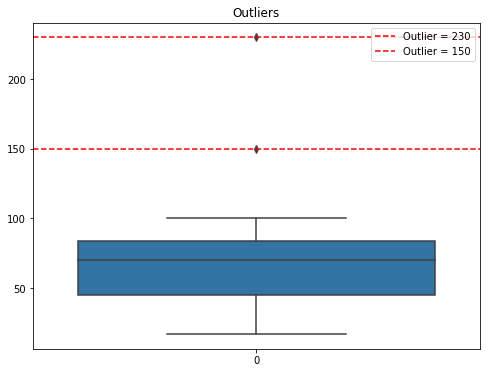

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=array)
plt.axhline(vals[0], c='r', ls='--', label=f'Outlier = {vals[0]}')
plt.axhline(vals[1], c='r', ls='--', label=f'Outlier = {vals[1]}')
plt.title('Outliers')
plt.legend(loc='upper right')
plt.show()

__Задача 3__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

Пусть событие $D$ - сессия сдана одним студентом, $E_i$ - студент учится на $i$-ом факультете. Всего учащихся - $235$ человек.

Тогда $P(E_i|D) = \dfrac{P(D|E_i) \cdot P(E_i)}{P(D)} - $ вероятность, что сессия сдана студентом, учащимся на $i$-ом факультете в соответствии с формулой Байеса.

Вероятности случайного выбора студента с факультетов: $P(E_1) = \dfrac{100}{235}, P(E_2) = \dfrac{90}{235}, P(E_3) = \dfrac{45}{235}$

Вероятности, что сессия будет сдана при условии того, что студент учится на $i$-ом факультете: $P(D|E_1) = 0.6, P(D|E_2) = 0.7, P(D|E_3) = 0.8$

Найдем вероятность сдачи сессии случайно выбранным студентом по формуле полной вероятности: $P(D) = P(D|E_1) \cdot P(E_1) + P(D|E_2) \cdot P(E_2) + P(D|E_3) \cdot P(E_3)$

Все величины для нахождения вероятностей того, что сессия будет сдана случайно выбранным студентом, учащимся на $i$-ом факультете найдены. Для вычислений воспользуемся $python$.

In [20]:
p_e1, p_e2, p_e3 = 100 / 235, 90 / 235, 45 / 235
p_de1, p_de2, p_de3 = 0.6, 0.7, 0.8

In [21]:
p_e1, p_e2, p_e3

(0.425531914893617, 0.3829787234042553, 0.19148936170212766)

In [22]:
p_d = p_e1 * p_de1 + p_e2 * p_de2 + p_e3 * p_de3
p_d

0.676595744680851

In [23]:
p_ed1 = p_de1 * p_e1 / p_d
p_ed2 = p_de2 * p_e2 / p_d
p_ed3 = p_de3 * p_e3 / p_d

In [24]:
for i, prob in enumerate([p_ed1, p_ed2, p_ed3], 1):
    print(f'Probablity that student studies on {i} faculty is: {prob:.4f}')

Probablity that student studies on 1 faculty is: 0.3774
Probablity that student studies on 2 faculty is: 0.3962
Probablity that student studies on 3 faculty is: 0.2264


In [14]:
sum([p_ed1, p_ed2, p_ed3])

1.0